In [1]:
from google.colab import files
uploaded = files.upload()

Saving Employee.csv to Employee.csv


Coeficientes: [-0.6489875   0.0655483   0.31292859  0.28764311 -0.06062245 -0.36172419
  0.17749828 -0.02859144 -0.22062267]
MSE: 0.28356605800214824
Valores Predichos: [1 1 1 0 1 1 1 0 0 0]
-Valores Reales-:  [1 1 1 1 0 0 1 1 0 1]


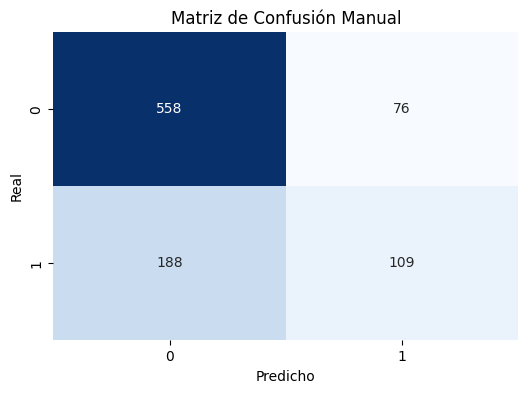

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
5,0,2016,0,3,22,1,0,0,0
6,0,2015,1,3,38,1,0,0,0
7,0,2016,0,3,34,0,0,2,1
8,0,2016,2,3,23,1,0,1,0
9,1,2017,1,2,37,1,0,2,0


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Entrenamiento del modelo de regresión logística
def train_logistic_regression(X, Y, iterations=100, learning_rate=0.001, reg_strength=0):
    X = np.column_stack([np.ones(X.shape[0]), X])
    coefficients = np.zeros(X.shape[1])

    for _ in range(iterations):
        gradients = calculate_gradients(X, Y, coefficients)
        reg_term = reg_strength * coefficients  # Regularización L2
        gradients += reg_term
        coefficients -= learning_rate * gradients

    return coefficients

# Cálculo de gradientes para regresión logística
def calculate_gradients(X, Y, coefficients):
    m = len(Y)
    predictions = sigmoid(np.dot(X, coefficients))
    return np.dot(X.T, (predictions - Y)) / m

# Predicción con regresión logística
def predict_logistic_regression(X, coefficients):
    X = np.column_stack([np.ones(X.shape[0]), X])
    predictions = np.vectorize(lambda p: 1 if p > 0.5 else 0)(sigmoid(np.dot(X, coefficients)))
    return predictions


# Lectura de datos desde el archivo 'Employee.csv'
df = pd.read_csv('Employee.csv')

# Label Encoding para algunas columnas
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['City'] = label_encoder.fit_transform(df['City'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['EverBenched'] = label_encoder.fit_transform(df['EverBenched'])

# Extracción de características y etiquetas
X = df[['Education', 'JoiningYear', 'City', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'PaymentTier']].values.astype(np.float64)
Y = df['LeaveOrNot'].values

# Escalado de características usando StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# División de datos en conjuntos de entrenamiento y prueba
def split_data(X, Y, train_percentage=0.8):
    train_size = int(train_percentage * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    Y_train, Y_test = Y[:train_size], Y[train_size:]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = split_data(X, Y)

# Entrenamiento del modelo de regresión logística
model_coefficients = train_logistic_regression(X_train, Y_train, iterations=700, learning_rate=0.019, reg_strength=0)

# Predicción y evaluación del modelo
predicted_values = predict_logistic_regression(X_test, model_coefficients)
mse = mean_squared_error(Y_test, predicted_values)

print(f'Coeficientes: {model_coefficients}')
print(f'MSE: {mse}')
print(f'Valores Predichos: {predicted_values[:10]}')
print(f'-Valores Reales-:  {Y_test[:10]}')


# Predicciones en el conjunto de prueba
predicted_values = predict_logistic_regression(X_test, model_coefficients)


# Cálculo de la matriz de confusión
def confusion_matrix_manual(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    true_negative = np.sum((y_true == 0) & (y_pred == 0))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([[true_negative, false_positive], [false_negative, true_positive]])

# Calcular la matriz de confusión manualmente
conf_matrix_manual = confusion_matrix_manual(Y_test, predicted_values)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_manual, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión Manual')
plt.show()

df.head(10)

